# Classification of two opposite emotions like delighted and frustrated

In [20]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [21]:
def extract_features(audio_path, sr=22050):
    y, _ = librosa.load(audio_path, sr=sr)

    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)

    # Pitch (F0)
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    f0 = [np.max(pitches[:, i]) if np.max(magnitudes[:, i]) > 0 else 0 for i in range(pitches.shape[1])]
    f0_mean = np.mean([pitch for pitch in f0 if pitch > 0])
    f0_std = np.std([pitch for pitch in f0 if pitch > 0])

    # Spectral Centroid
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_centroid_mean = np.mean(spectral_centroids)
    spectral_centroid_std = np.std(spectral_centroids)

    # Pack features into a flat array
    features = np.concatenate([mfccs_mean, mfccs_std, [f0_mean, f0_std, spectral_centroid_mean, spectral_centroid_std]])
    return features

In [22]:
pth = "Binary_Classification"
folders = ['frustrated', 'delighted']

feature_list = []
labels = []

for label in folders:
    folder_path = os.path.join(pth, label)
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(folder_path, file_name)
            features = extract_features(file_path)
            feature_list.append(features)
            labels.append(label)

X = np.array(feature_list)
y = np.array(labels)

c:\Users\Meghal\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1905
  warnings.warn(


In [23]:
feature_names = [f'mfcc_mean_{i}' for i in range(13)] + \
                [f'mfcc_std_{i}' for i in range(13)] + \
                ['f0_mean', 'f0_std', 'spectral_centroid_mean', 'spectral_centroid_std']
df = pd.DataFrame(X, columns=feature_names)
df['label'] = y

In [24]:
df['label'] = LabelEncoder().fit_transform(df['label'])  # 0 for frustrated, 1 for delighted

In [25]:
print("Statistical Summary:")
print(df.groupby('label').describe())

Statistical Summary:
      mfcc_mean_0                                                             \
            count        mean        std         min         25%         50%   
label                                                                          
0          1272.0 -257.271441  75.700477 -503.612305 -307.789307 -253.125519   
1          1536.0 -253.291649  74.380524 -471.348114 -301.261414 -253.090553   

                             mfcc_mean_1              ...  \
              75%        max       count        mean  ...   
label                                                 ...   
0     -199.233524 -83.732986      1272.0  110.913158  ...   
1     -205.438419 -43.792938      1536.0   86.647805  ...   

      spectral_centroid_mean              spectral_centroid_std              \
                         75%          max                 count        mean   
label                                                                         
0                2074.711471  3850.

# Class Distinction between two group

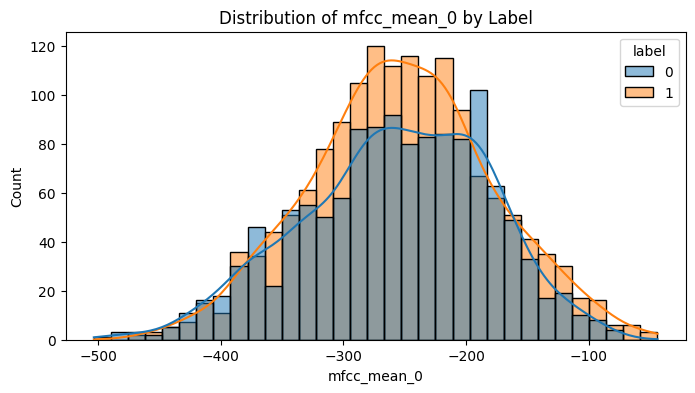

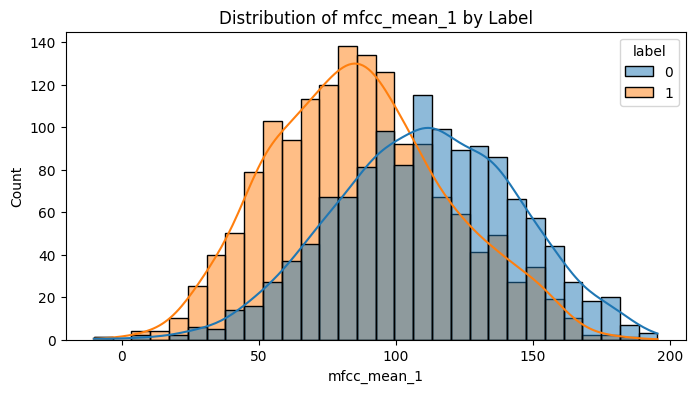

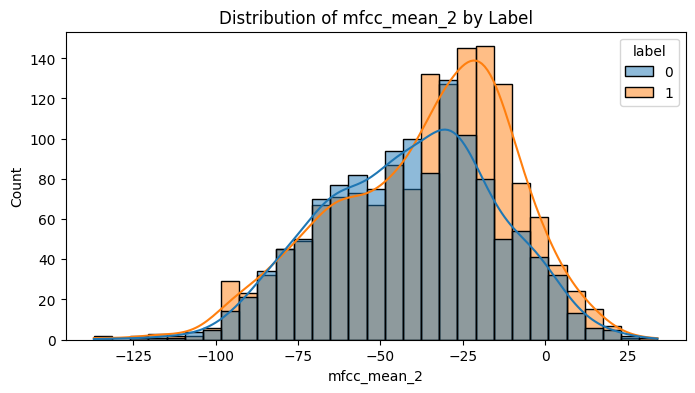

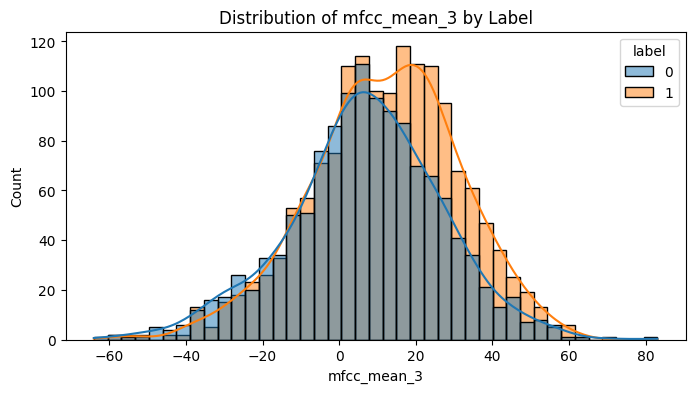

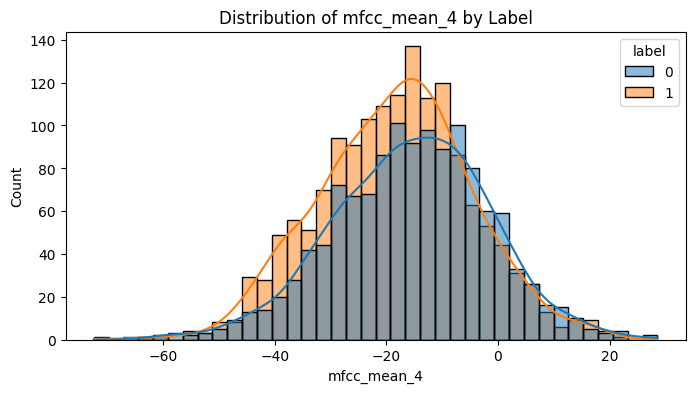

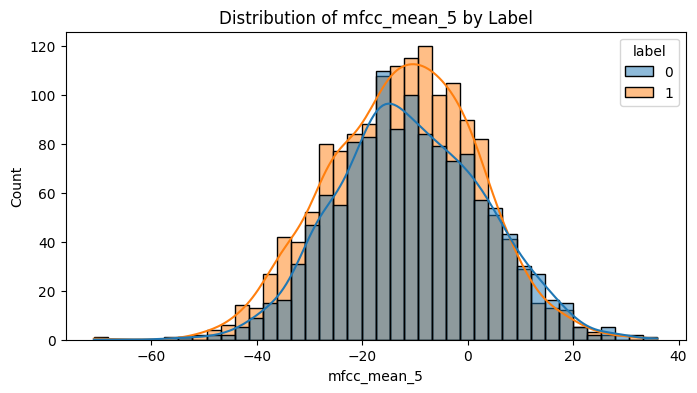

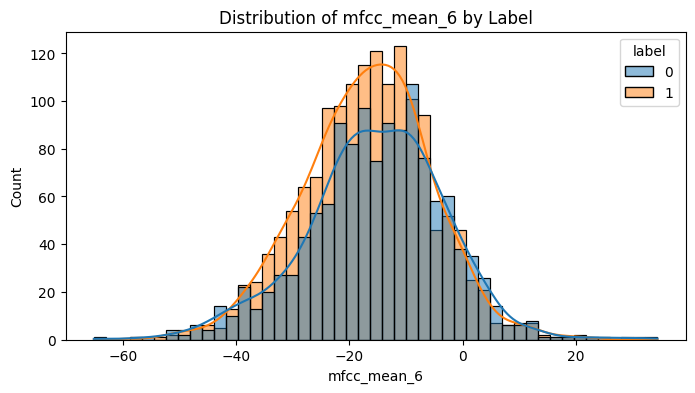

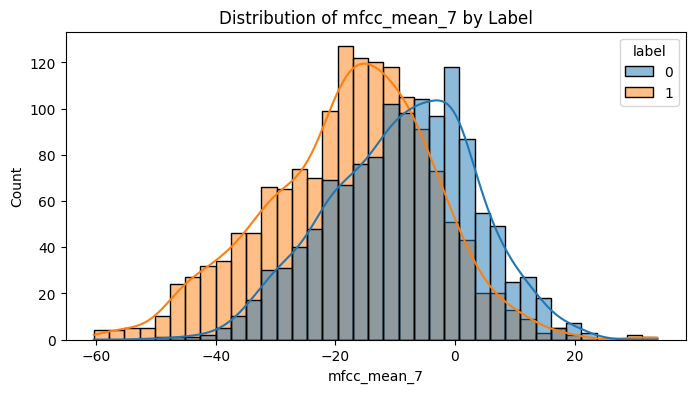

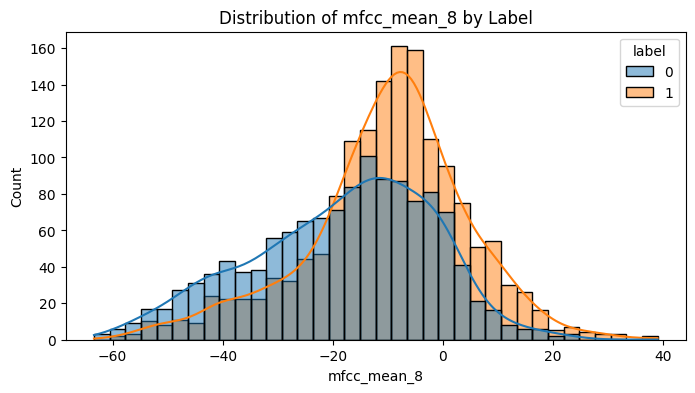

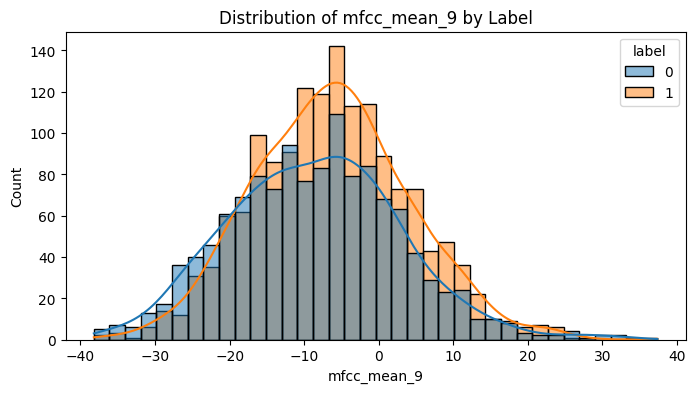

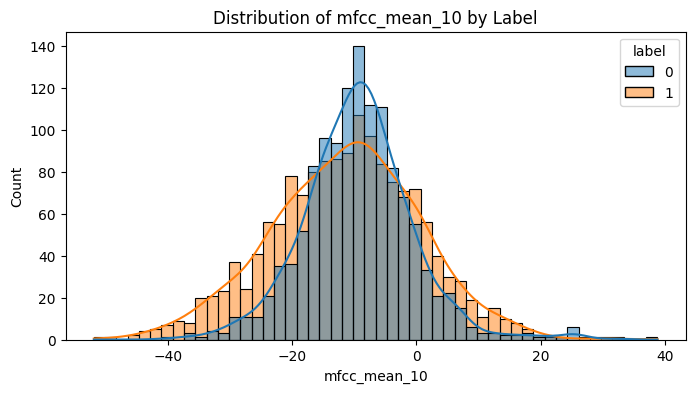

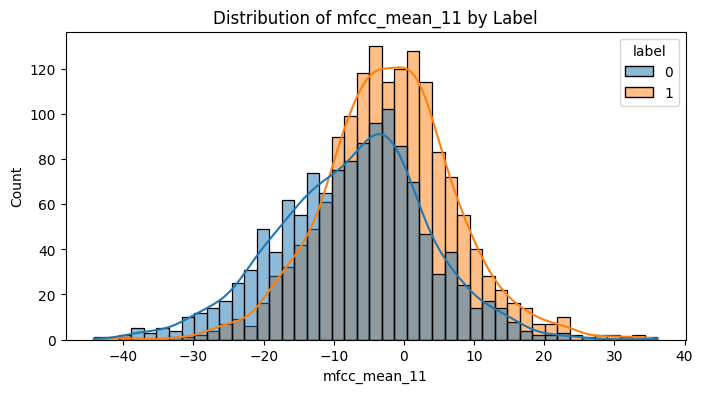

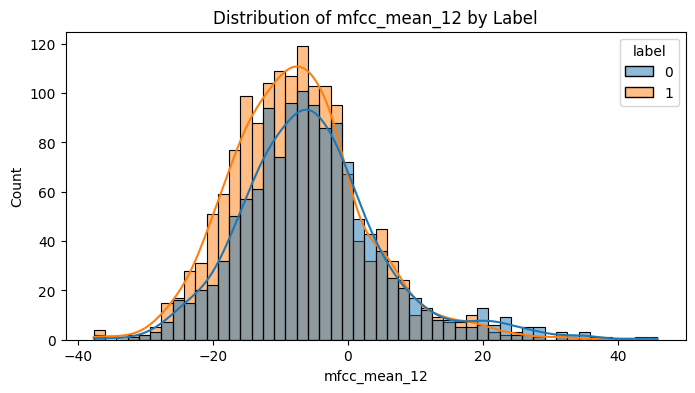

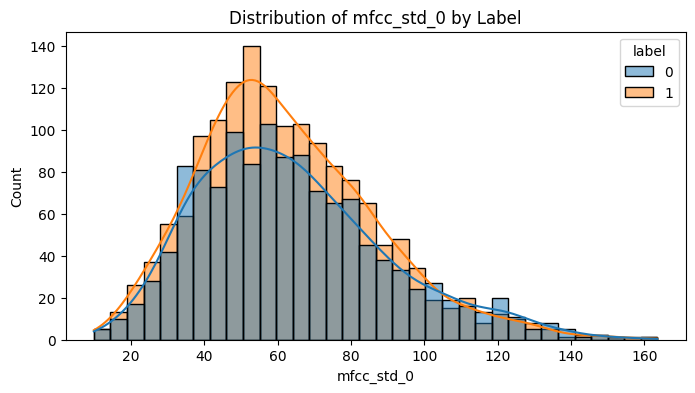

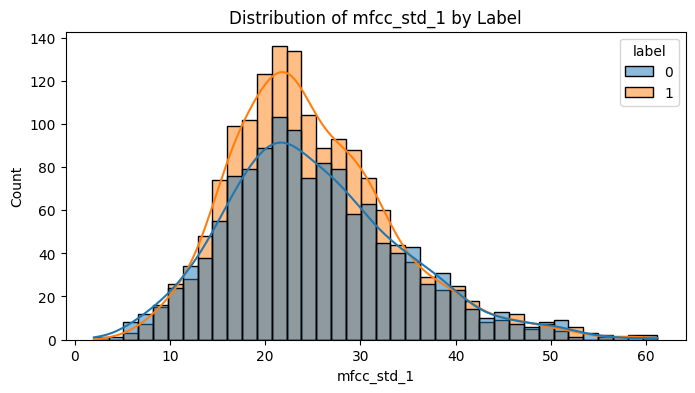

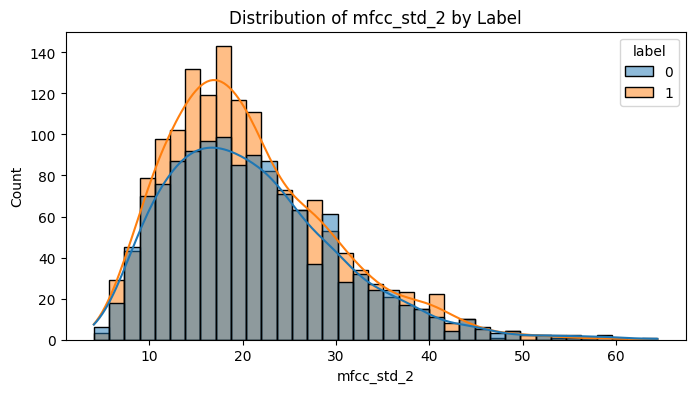

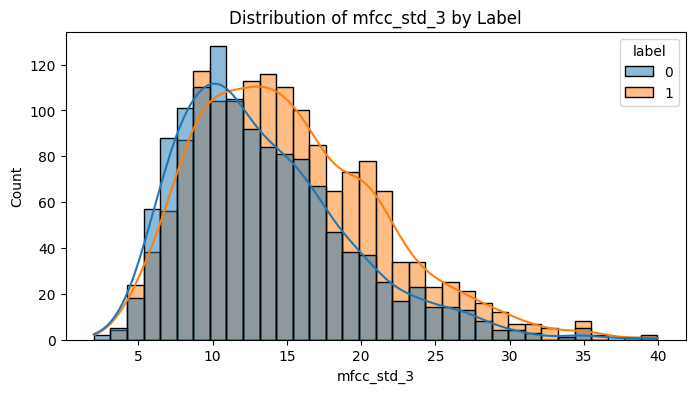

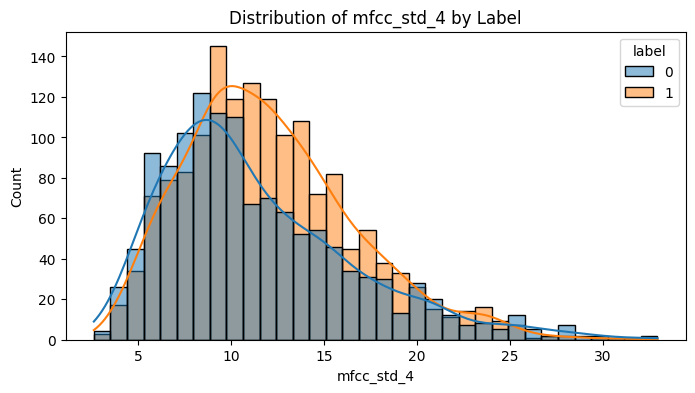

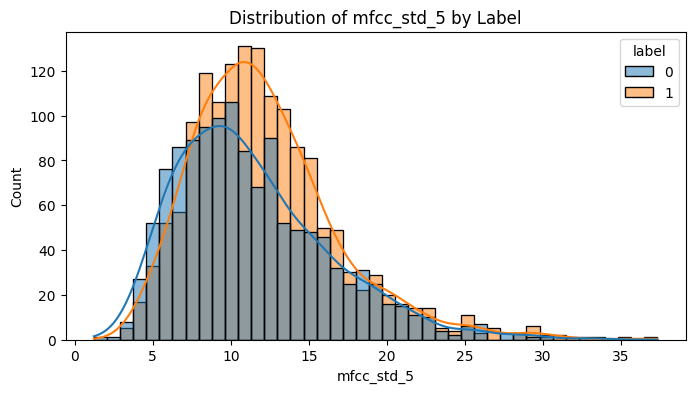

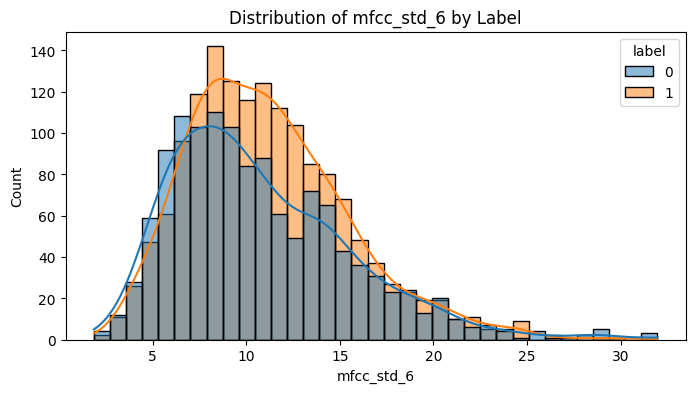

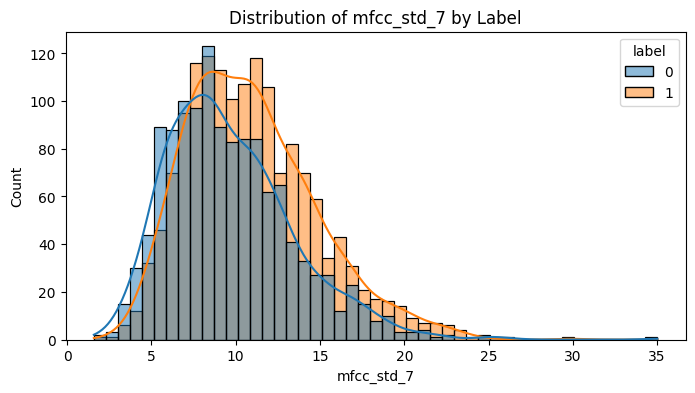

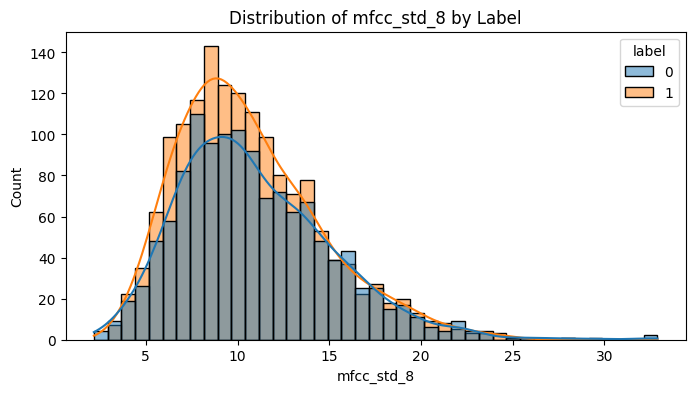

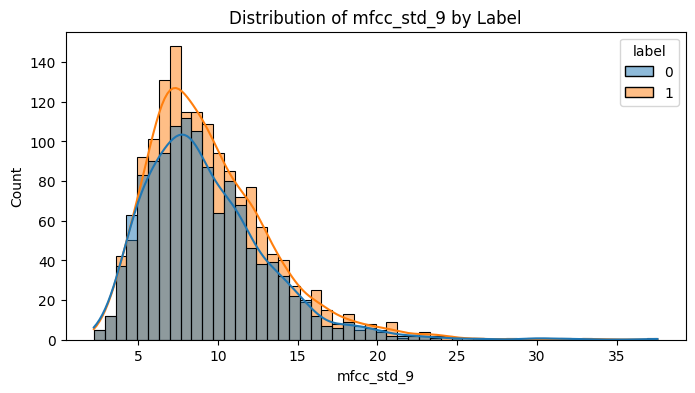

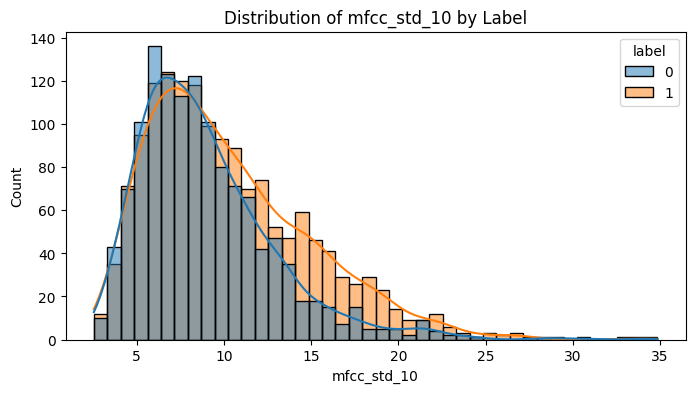

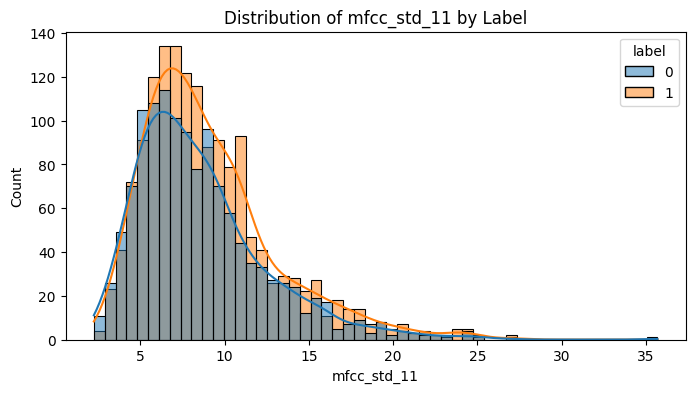

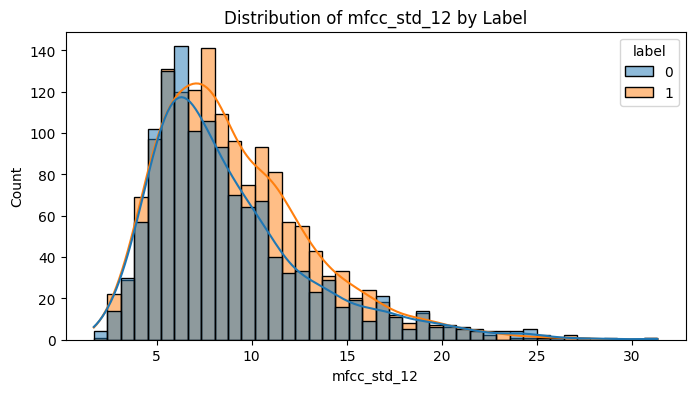

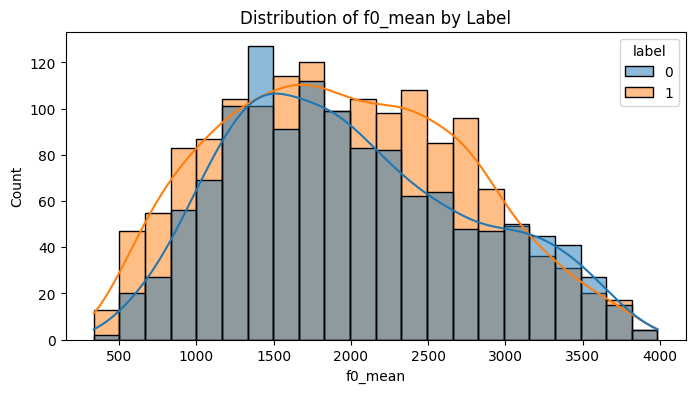

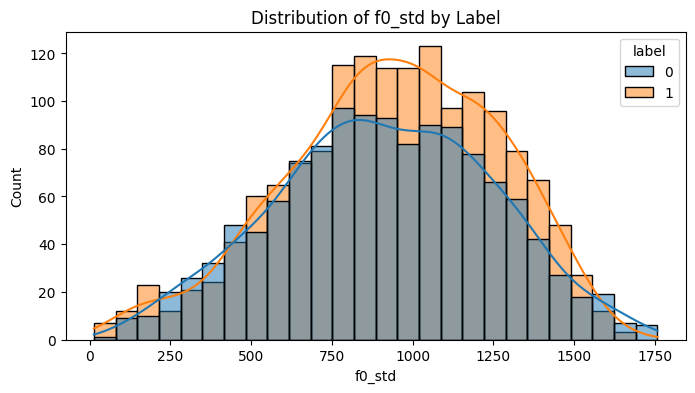

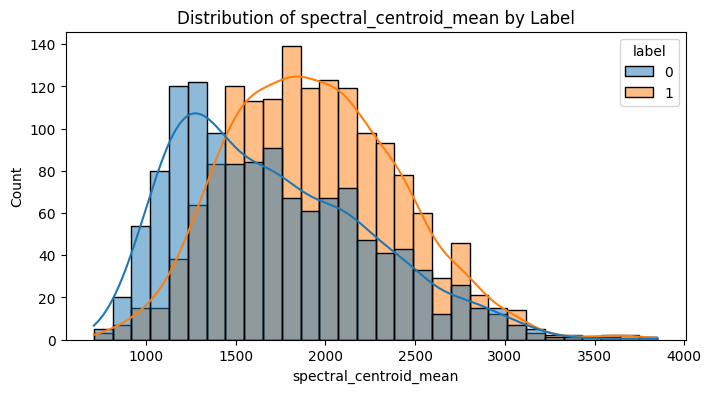

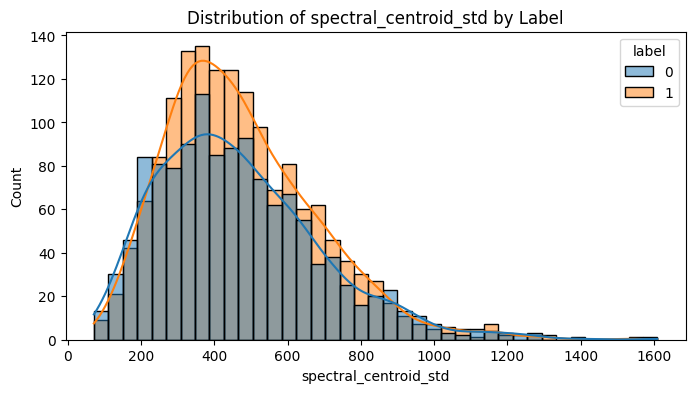

In [26]:
for feature in feature_names:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue='label', kde=True)
    plt.title(f'Distribution of {feature} by Label')
    plt.show()

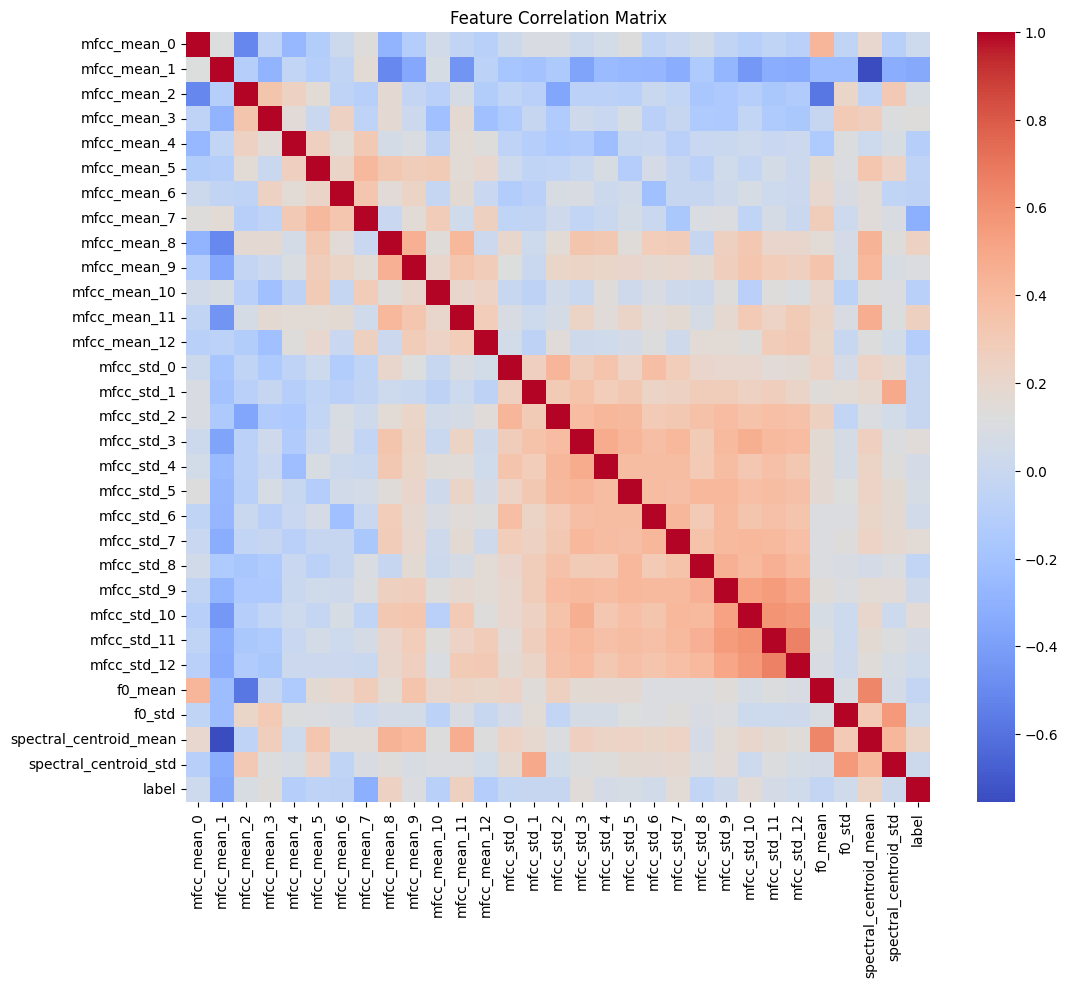

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=folders))

Accuracy: 0.8256227758007118
              precision    recall  f1-score   support

  frustrated       0.79      0.84      0.81       252
   delighted       0.86      0.82      0.84       310

    accuracy                           0.83       562
   macro avg       0.82      0.83      0.82       562
weighted avg       0.83      0.83      0.83       562



In [15]:
importances = model.feature_importances_
feature_names = [f'MFCC_{i}_mean' for i in range(13)] + [f'MFCC_{i}_std' for i in range(13)] + ['F0_mean', 'F0_std', 'Spectral_centroid_mean', 'Spectral_centroid_std']
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(feature_importances)

                   feature  importance
7              MFCC_7_mean    0.098782
1              MFCC_1_mean    0.073540
28  Spectral_centroid_mean    0.055311
8              MFCC_8_mean    0.053557
11            MFCC_11_mean    0.045292
10            MFCC_10_mean    0.045053
26                 F0_mean    0.036859
0              MFCC_0_mean    0.036170
3              MFCC_3_mean    0.035562
4              MFCC_4_mean    0.032991
6              MFCC_6_mean    0.029153
13              MFCC_0_std    0.029148
12            MFCC_12_mean    0.028656
2              MFCC_2_mean    0.028447
20              MFCC_7_std    0.028367
5              MFCC_5_mean    0.026145
17              MFCC_4_std    0.026076
25             MFCC_12_std    0.025343
18              MFCC_5_std    0.023412
27                  F0_std    0.023395
23             MFCC_10_std    0.023386
15              MFCC_2_std    0.023022
29   Spectral_centroid_std    0.022565
16              MFCC_3_std    0.022464
21              MFCC_8_st

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Model Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb, target_names=folders))

# Feature importances
importances_gb = gb_model.feature_importances_
feature_importances_gb = pd.DataFrame({'feature': feature_names, 'importance': importances_gb})
feature_importances_gb = feature_importances_gb.sort_values(by='importance', ascending=False)
print(feature_importances_gb)

Gradient Boosting Model Accuracy: 0.800711743772242
              precision    recall  f1-score   support

  frustrated       0.76      0.82      0.79       252
   delighted       0.84      0.78      0.81       310

    accuracy                           0.80       562
   macro avg       0.80      0.80      0.80       562
weighted avg       0.80      0.80      0.80       562

                   feature  importance
7              MFCC_7_mean    0.203403
1              MFCC_1_mean    0.137404
8              MFCC_8_mean    0.094847
10            MFCC_10_mean    0.070952
0              MFCC_0_mean    0.068428
28  Spectral_centroid_mean    0.060642
11            MFCC_11_mean    0.059811
13              MFCC_0_std    0.032665
3              MFCC_3_mean    0.030371
2              MFCC_2_mean    0.025475
17              MFCC_4_std    0.021565
26                 F0_mean    0.021035
6              MFCC_6_mean    0.018549
27                  F0_std    0.017756
4              MFCC_4_mean    0.0156

In [19]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_mlp = mlp_model.predict(X_test)
print("MLP Model Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp, target_names=folders))

# Feature importance (can be approximated from the first layer weights)
# MLP doesn’t directly offer feature importances, but we can inspect the first layer weights
mlp_importances = np.abs(mlp_model.coefs_[0]).sum(axis=1)
mlp_feature_importances = pd.DataFrame({'feature': feature_names, 'importance': mlp_importances})
mlp_feature_importances = mlp_feature_importances.sort_values(by='importance', ascending=False)
print(mlp_feature_importances)

MLP Model Accuracy: 0.6957295373665481
              precision    recall  f1-score   support

  frustrated       0.79      0.44      0.56       252
   delighted       0.66      0.91      0.77       310

    accuracy                           0.70       562
   macro avg       0.73      0.67      0.66       562
weighted avg       0.72      0.70      0.68       562

                   feature  importance
7              MFCC_7_mean   10.785083
4              MFCC_4_mean    9.898739
5              MFCC_5_mean    9.837102
27                  F0_std    9.754250
12            MFCC_12_mean    9.754163
2              MFCC_2_mean    9.578176
16              MFCC_3_std    9.420323
8              MFCC_8_mean    9.376499
11            MFCC_11_mean    9.335609
25             MFCC_12_std    9.333501
22              MFCC_9_std    9.140965
1              MFCC_1_mean    9.080370
29   Spectral_centroid_std    9.043078
13              MFCC_0_std    9.024488
10            MFCC_10_mean    9.011175
18        